In [1]:
import tensorflow as tf
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
directory = './cleandata/(3)'
# 원본 이미지 사이즈 확인
image = cv2.imread('./cleandata/(3)/pass/2023-08-31(4).jpeg')
print(image.shape)
Height, Width, Channel = image.shape


(720, 960, 3)


In [3]:
train_data = utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(Height, Width), # 원래 이미지의 사이즈를 그대로 사용하였음.
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val_data = utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(Height, Width),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5843 files belonging to 2 classes.
Using 4675 files for training.
Found 5843 files belonging to 2 classes.
Using 1168 files for validation.


2024-02-21 21:23:18.338853: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 21:23:19.516047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22305 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-02-21 21:23:19.516609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22305 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6
2024-02-21 21:23:19.517011: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0

In [4]:
class_names = train_data.class_names
print(class_names)
# 이미지 실제로 불러와서 확인하기
for images, labels in train_data.take(1):
    image = images[0].numpy().astype("uint8")
    break


['fail', 'pass']


2024-02-21 21:23:21.187791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [5]:
from tensorflow.keras import layers, Sequential, Input
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

normalized_train = train_data.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_data.map(lambda x, y: (normalization_layer(x), y))

model = Sequential([
  layers.Input(shape=(Height, Width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### 예시를 위하여 전처리가 되지 않은 데이터를 학습하였습니다. Loss function이 안정되지 않은 이유는 그 때문입니다.

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs=10
history = model.fit(
  normalized_train,
  validation_data=normalized_val,
  epochs=epochs
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 720, 960, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 360, 480, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 480, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 180, 240, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 240, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 120, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 691200)            0

2024-02-21 21:26:29.619530: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2024-02-21 21:26:30.310839: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-21 21:26:31.412818: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


147/147 [==============================] - 29s 168ms/step - loss: 0.7166 - accuracy: 0.9929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
147/147 [==============================] - 25s 171ms/step - loss: 0.6083 - accuracy: 0.9929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
147/147 [==============================] - 25s 169ms/step - loss: 0.9173 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
147/147 [==============================] - 25s 171ms/step - loss: 0.1401 - accuracy: 0.9929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
147/147 [==============================] - 25s 170ms/step - loss: 0.3087 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
147/147 [==============================] - 25s 170ms/step - loss: 0.1322 - accuracy: 0.9929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
147/147 [==============================] - 25s 170ms/step - loss: 0.9496 - accuracy: 0.9998 - val_loss: 0.

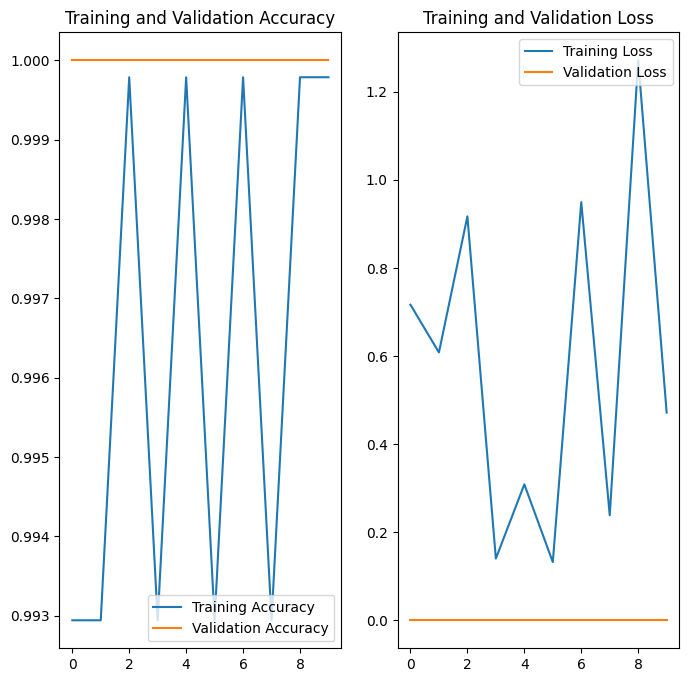

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()